In [1]:
from pathlib import Path
import pandas as pd
import numpy as np

In [2]:
import fp_utils

In [3]:
fp_utils.settings.init_fp_utils()

INFO: Pandarallel will run on 4 workers.
INFO: Pandarallel will use Memory file system to transfer data between the main process and workers.


In [4]:
data_dir = Path('../data')
df_name = '1e5.pickle'

In [5]:
df = fp_utils.data_io.DataFrameLoader.pickle(data_dir / df_name)
df.shape

(100000, 2575)

# Corectness tests

In [6]:
from fp_utils.finders import BFRamFinder, SplitterTreeFinder

In [7]:
bf_finder = BFRamFinder(df)

0.000s -- BFRamFinder init time


In [8]:
tree_finder = SplitterTreeFinder(df, data_dir / 'tree')

28.405s -- SplitterTreeFinder init time


In [9]:
checker = fp_utils.tests.FinderCorrectnessTester(bf_finder, [tree_finder])

In [10]:
queries = df.sample(20)

In [11]:
%%time
checker.test_all(queries, verbose=True)

-----
Test #000
OK -- SplitterTreeFinder
-----
Test #001
OK -- SplitterTreeFinder
-----
Test #002
OK -- SplitterTreeFinder
-----
Test #003
OK -- SplitterTreeFinder
-----
Test #004
OK -- SplitterTreeFinder
-----
Test #005
OK -- SplitterTreeFinder
-----
Test #006
OK -- SplitterTreeFinder
-----
Test #007
OK -- SplitterTreeFinder
-----
Test #008
OK -- SplitterTreeFinder
-----
Test #009
OK -- SplitterTreeFinder
-----
Test #010
OK -- SplitterTreeFinder
-----
Test #011
OK -- SplitterTreeFinder
-----
Test #012
OK -- SplitterTreeFinder
-----
Test #013
OK -- SplitterTreeFinder
-----
Test #014
OK -- SplitterTreeFinder
-----
Test #015
OK -- SplitterTreeFinder
-----
Test #016
OK -- SplitterTreeFinder
-----
Test #017
OK -- SplitterTreeFinder
-----
Test #018
OK -- SplitterTreeFinder
-----
Test #019
OK -- SplitterTreeFinder
-----
CPU times: user 13.5 s, sys: 5.9 s, total: 19.4 s
Wall time: 19.4 s


array([ True])

# Speed tests

In [12]:
from fp_utils.tests import FinderSpeedTester

In [13]:
class Tree20k(SplitterTreeFinder):
    BUCKET_SIZE = 20000

class Tree15k(SplitterTreeFinder):
    BUCKET_SIZE = 15000

class Tree10k(SplitterTreeFinder):
    BUCKET_SIZE = 10000
    
class Tree5k(SplitterTreeFinder):
    BUCKET_SIZE = 5000

In [14]:
tree_20k = Tree20k(df, data_dir / '20k')

27.589s -- SplitterTreeFinder init time


In [15]:
tree_15k = Tree15k(df, data_dir / '15k')

27.220s -- SplitterTreeFinder init time


In [16]:
tree_10k = Tree10k(df, data_dir / '10k')

27.137s -- SplitterTreeFinder init time


In [17]:
tree_5k = Tree5k(df, data_dir / '5k')

26.341s -- SplitterTreeFinder init time


In [18]:
speedTester = FinderSpeedTester([bf_finder, tree_5k, tree_10k, tree_15k, tree_20k])

In [19]:
stat = speedTester.test_all(queries)

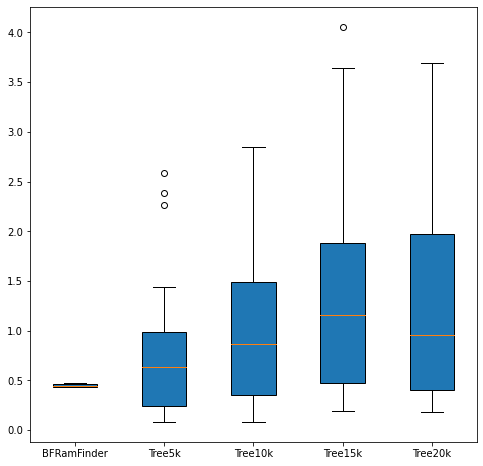

In [20]:
stat.as_boxplot()

In [21]:
class Tree4k(SplitterTreeFinder):
    BUCKET_SIZE = 4000
    
class Tree3k(SplitterTreeFinder):
    BUCKET_SIZE = 3000

class Tree2k(SplitterTreeFinder):
    BUCKET_SIZE = 2000
    
class Tree1k(SplitterTreeFinder):
    BUCKET_SIZE = 1000

In [22]:
tree_4k = Tree4k(df, data_dir / '4k')

29.020s -- SplitterTreeFinder init time


In [23]:
tree_3k = Tree3k(df, data_dir / '3k')

26.697s -- SplitterTreeFinder init time


In [24]:
tree_2k = Tree2k(df, data_dir / '2k')

26.926s -- SplitterTreeFinder init time


In [26]:
tree_1k = Tree1k(df, data_dir / '1k')

25.755s -- SplitterTreeFinder init time


In [27]:
speedTester = FinderSpeedTester([bf_finder, tree_1k, tree_2k, tree_3k, tree_4k, tree_5k])

In [28]:
stat = speedTester.test_all(queries)

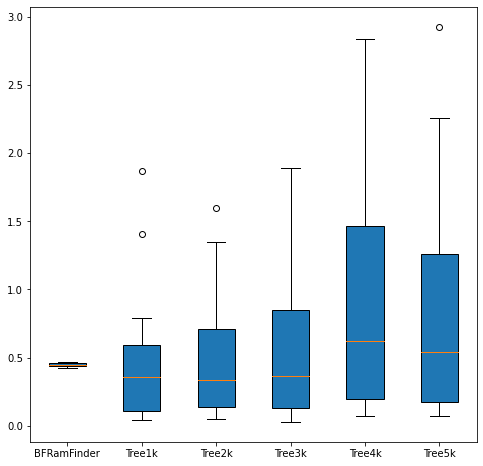

In [29]:

stat.as_boxplot()

In [30]:
class Tree500(SplitterTreeFinder):
    BUCKET_SIZE = 500

class Tree100(SplitterTreeFinder):
    BUCKET_SIZE = 100
    
class Tree50(SplitterTreeFinder):
    BUCKET_SIZE = 50

In [32]:
tree_500 = Tree500(df, data_dir / '500')

25.345s -- SplitterTreeFinder init time


In [33]:
tree_100 = Tree100(df, data_dir / '100')

26.932s -- SplitterTreeFinder init time


In [36]:
speedTester = FinderSpeedTester([bf_finder, tree_100, tree_500, tree_1k])

In [38]:
stat = speedTester.test_all(queries)

In [ ]:
stat.as_boxplot(figsize=(8, 10))